In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pyheif

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 12.1 MB/s eta 0:00:00


## [1. 파일 전처리]


*   3 * 256 * 256 크기로 일괄 변환함.
* 각 데이터는 (텐서이미지, 라벨) 의 튜플로 되어 있음.
* 10-1 과 10-2 는 수화로 10을 표현하는 두 가지 방법인 바, 일괄 10으로 라벨 설정함.
*   train_data를 단일 list 에 append 함.



In [ ]:
import os
import numpy as np
from PIL import Image
import pyheif
import torch
from torchvision import transforms

dataset_folder_path = "/content/drive/MyDrive/archive/train"
subdirs = [d for d in os.listdir(dataset_folder_path) if os.path.isdir(os.path.join(dataset_folder_path, d))]

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.CenterCrop((256, 256)),
    transforms.ToTensor(),
])

train_data = []
# 폴더 내의 각 파일에 대해 반복
for sub in subdirs:
  folder_path = os.path.join(dataset_folder_path, sub)
  try :  sub = int(sub)
  except: label = 10
  else: label = sub

  # 폴더 내의 각 이미지 파일에 대해 반복
  for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    try:  image = Image.open(file_path)
    except:         # HEIC 이미지를 RGB로 디코딩하고 PIL Image로 변환
      image = pyheif.read(file_path)
      image = Image.frombytes(
          image.mode,
          image.size,
          image.data,
          "raw",
          image.mode,
          image.stride,
      )
    else:
      image = Image.open(file_path)
    image = transform(image)
    image = (image, label)
    train_data.append(image)

## [2. 변환 과정 확인]
* 전체 777개 train_data 파일은 튜플형태로 list 저장
* 출력 정상적으로 되는 것으로 보임

In [ ]:
len(train_data)

708

In [ ]:
train_data[0][0].size()

torch.Size([3, 256, 256])

6


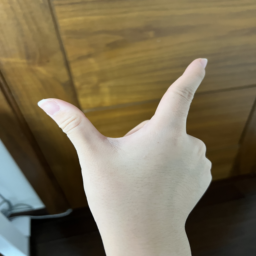

In [ ]:
numpy_image = (train_data[0][0].permute(1, 2, 0).numpy() * 255).astype('uint8')

# 넘파이 배열을 PIL Image로 변환
pil_image = Image.fromarray(numpy_image)

# 이미지 출력
print(train_data[0][1])
pil_image

## [4. 피클 형태로 저장]
* 리스트로 저장한 것을 train_data_list.pkl 로 저장

In [ ]:
import pickle

directory_path = '/content/drive/MyDrive/archive/'
file_name = 'train_data_list.pkl'

with open(directory_path + file_name, 'wb') as file:
    pickle.dump(train_data, file)

## [5. 저장한 pkl 파일 불러와서 확인]
* 잘 저장된 것으로 확인

6


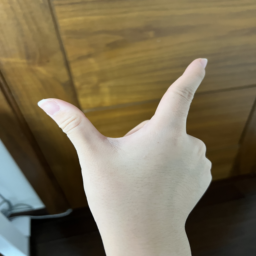

In [ ]:
file_path = '/content/drive/MyDrive/archive/train_data_list.pkl'

# 피클 파일 불러오기
with open(file_path, 'rb') as file:
    loaded_train_data = pickle.load(file)

# 불러온 데이터 확인
loaded_train_data
numpy_image = (loaded_train_data[0][0].permute(1, 2, 0).numpy() * 255).astype('uint8')

# 넘파이 배열을 PIL Image로 변환
pil_image = Image.fromarray(numpy_image)

# 이미지 출력
print(train_data[0][1])
pil_image

## [6. 동일한 변환작업 test 대상으로 진행]

In [ ]:
dataset_folder_path = "/content/drive/MyDrive/archive/test"
subdirs = [d for d in os.listdir(dataset_folder_path) if os.path.isdir(os.path.join(dataset_folder_path, d))]

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.CenterCrop((256, 256)),
    transforms.ToTensor(),
])

test_data = []
# 폴더 내의 각 파일에 대해 반복
for sub in subdirs:
  folder_path = os.path.join(dataset_folder_path, sub)
  try :  sub = int(sub)
  except: label = 10
  else: label = sub

  # 폴더 내의 각 이미지 파일에 대해 반복
  for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    try:  image = Image.open(file_path)
    except:         # HEIC 이미지를 RGB로 디코딩하고 PIL Image로 변환
      image = pyheif.read(file_path)
      image = Image.frombytes(
          image.mode,
          image.size,
          image.data,
          "raw",
          image.mode,
          image.stride,
      )
    else:
      image = Image.open(file_path)
    image = transform(image)
    image = (image, label)
    test_data.append(image)

In [ ]:
len(test_data)

329

In [ ]:
test_data[0][0].size()

torch.Size([3, 256, 256])

2


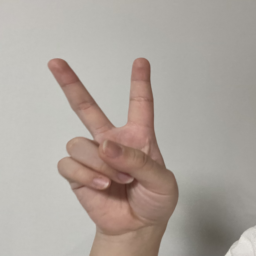

In [ ]:
numpy_image = (test_data[0][0].permute(1, 2, 0).numpy() * 255).astype('uint8')

# 넘파이 배열을 PIL Image로 변환
pil_image = Image.fromarray(numpy_image)

# 이미지 출력
print(test_data[0][1])
pil_image

## [7. test_data 를 pkl 저장]


In [ ]:
directory_path = '/content/drive/MyDrive/archive/'
file_name = 'test_data_list.pkl'

with open(directory_path + file_name, 'wb') as file:
    pickle.dump(test_data, file)

## [8. test_data 확인]

2


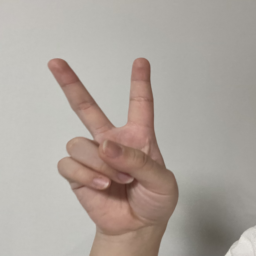

In [ ]:
file_path = '/content/drive/MyDrive/archive/test_data_list.pkl'

# 피클 파일 불러오기
with open(file_path, 'rb') as file:
    loaded_test_data = pickle.load(file)

# 불러온 데이터 확인
loaded_test_data
numpy_image = (loaded_test_data[0][0].permute(1, 2, 0).numpy() * 255).astype('uint8')

# 넘파이 배열을 PIL Image로 변환
pil_image = Image.fromarray(numpy_image)

# 이미지 출력
print(test_data[0][1])
pil_image

In [ ]:
file_path = '/content/drive/MyDrive/archive/test_data_array.pkl'

# 피클 파일 불러오기
with open(file_path, 'rb') as file:
    loaded_test_data = pickle.load(file)

# 불러온 데이터 확인
loaded_test_data
numpy_image = (loaded_test_data[0][0].permute(1, 2, 0).numpy() * 255).astype('uint8')

# 넘파이 배열을 PIL Image로 변환
pil_image = Image.fromarray(numpy_image)

# 이미지 출력
print(test_data[0][1])
pil_image

#[+ Contour imageset]
* 이하는 "20240213_Kubig24W_contest_ContourImage.ipynb" 코드를 수행한 것으로 해당 파일 참고

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from PIL import Image
import pyheif
import torch
from torchvision import transforms

dataset_folder_path = "/content/drive/MyDrive/archive/train"
subdirs = [d for d in os.listdir(dataset_folder_path) if os.path.isdir(os.path.join(dataset_folder_path, d))]

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.CenterCrop((256, 256))
])

train_data = []
i_count = 0
# 폴더 내의 각 파일에 대해 반복
for sub in subdirs:
  folder_path = os.path.join(dataset_folder_path, sub)
  try :  sub = int(sub)
  except: label = 10
  else: label = sub

  # 폴더 내의 각 이미지 파일에 대해 반복
  for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    try:  image = Image.open(file_path)
    except:         # HEIC 이미지를 RGB로 디코딩하고 PIL Image로 변환
      image = pyheif.read(file_path)
      image = Image.frombytes(
          image.mode,
          image.size,
          image.data,
          "raw",
          image.mode,
          image.stride,
      )
    else:
      image = Image.open(file_path)
    image = transform(image)
    image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    largest_contour = max(contours, key=cv2.contourArea)

    contour_image = image.copy()
    cv2.drawContours(contour_image, [largest_contour], -1, (0, 255, 0), 2)
    contour_image = torch.from_numpy(contour_image)
    train_data.append((contour_image.permute(2, 0, 1), label))
    i_count += 1
    if i_count % 10 == 0:
      print(f'{i_count} success!')

10 success!
20 success!
30 success!
40 success!
50 success!
60 success!
70 success!
80 success!
90 success!
100 success!
110 success!
120 success!
130 success!
140 success!
150 success!
160 success!
170 success!
180 success!
190 success!
200 success!
210 success!
220 success!
230 success!
240 success!
250 success!
260 success!
270 success!
280 success!
290 success!
300 success!
310 success!
320 success!
330 success!
340 success!
350 success!
360 success!
370 success!
380 success!
390 success!
400 success!
410 success!
420 success!
430 success!
440 success!
450 success!
460 success!
470 success!
480 success!
490 success!
500 success!
510 success!
520 success!
530 success!
540 success!
550 success!
560 success!
570 success!
580 success!
590 success!
600 success!
610 success!
620 success!
630 success!
640 success!
650 success!
660 success!
670 success!
680 success!
690 success!
700 success!


In [ ]:
train_data[0][0].shape

torch.Size([3, 256, 256])

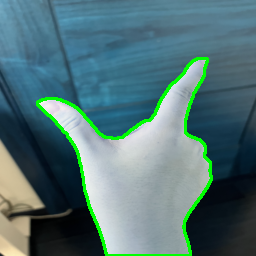

In [ ]:
from torchvision.transforms import ToPILImage

to_pil = ToPILImage()
pil_image = to_pil(train_data[0][0])
pil_image

In [ ]:
len(train_data)

708

In [ ]:
import pickle

directory_path = '/content/drive/MyDrive/archive/'
file_name = 'train_data_contour.pkl'

with open(directory_path + file_name, 'wb') as file:
    pickle.dump(train_data, file)

## [+ same to test_file]

In [ ]:
dataset_folder_path = "/content/drive/MyDrive/archive/test"
subdirs = [d for d in os.listdir(dataset_folder_path) if os.path.isdir(os.path.join(dataset_folder_path, d))]

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.CenterCrop((256, 256))
])

test_data = []
i_count = 0
# 폴더 내의 각 파일에 대해 반복
for sub in subdirs:
  folder_path = os.path.join(dataset_folder_path, sub)
  try :  sub = int(sub)
  except: label = 10
  else: label = sub

  # 폴더 내의 각 이미지 파일에 대해 반복
  for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    try:  image = Image.open(file_path)
    except:         # HEIC 이미지를 RGB로 디코딩하고 PIL Image로 변환
      image = pyheif.read(file_path)
      image = Image.frombytes(
          image.mode,
          image.size,
          image.data,
          "raw",
          image.mode,
          image.stride,
      )
    else:
      image = Image.open(file_path)
    image = transform(image)
    image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    largest_contour = max(contours, key=cv2.contourArea)

    contour_image = image.copy()
    cv2.drawContours(contour_image, [largest_contour], -1, (0, 255, 0), 2)
    contour_image = torch.from_numpy(contour_image)
    test_data.append((contour_image.permute(2, 0, 1), label))
    i_count += 1
    if i_count % 10 == 0:
      print(f'{i_count} success!')

10 success!
20 success!
30 success!
40 success!
50 success!
60 success!
70 success!
80 success!
90 success!
100 success!
110 success!
120 success!
130 success!
140 success!
150 success!
160 success!
170 success!
180 success!
190 success!
200 success!
210 success!
220 success!
230 success!
240 success!
250 success!
260 success!
270 success!
280 success!
290 success!
300 success!
310 success!
320 success!


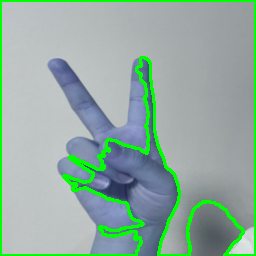

In [ ]:
to_pil = ToPILImage()
pil_image = to_pil(test_data[0][0])
pil_image

In [ ]:
len(test_data)

329

In [ ]:
directory_path = '/content/drive/MyDrive/archive/'
file_name = 'test_data_contour.pkl'

with open(directory_path + file_name, 'wb') as file:
    pickle.dump(test_data, file)